In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
test.shape

(418, 11)

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Percentage of Women Survived: 74.20382165605095
Percentage of men Survived: 18.890814558058924


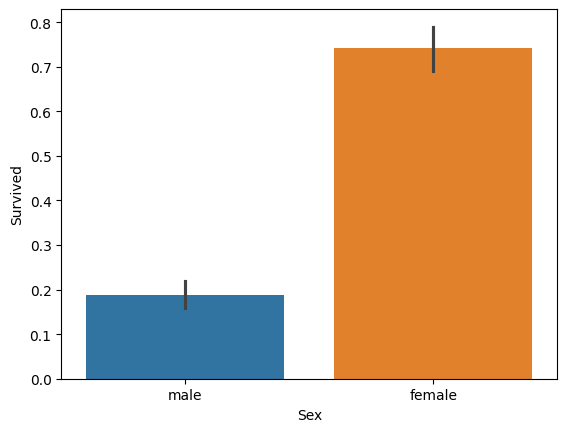

In [8]:
sns.barplot(data=train,x='Sex',y='Survived',hue='Sex')
percentage_women_survived = train['Survived'][train['Sex'] == 'female'].value_counts(normalize=True).get(1, 0) * 100
print('Percentage of Women Survived:', percentage_women_survived)
percentage_men_survived = train['Survived'][train['Sex'] == 'male'].value_counts(normalize=True).get(1, 0) * 100
print('Percentage of men Survived:', percentage_men_survived)

In [9]:
percentage_men_survived = train.groupby('Sex')['Survived'].mean()['male'] * 100
print('Percentage of men Survived:', percentage_men_survived)

Percentage of men Survived: 18.890814558058924


In [10]:
men_survived_percentage = train[train['Sex']=='male']['Survived'].sum()/len(train[train['Sex']=='male'])*100

In [11]:
men_survived_percentage

np.float64(18.890814558058924)

In [12]:
femal_survived_percentage= train[train['Sex']=='female']['Survived'].sum()/len(train[train['Sex']=='female'])*100

In [13]:
femal_survived_percentage

np.float64(74.20382165605095)

# PClass

<Axes: xlabel='Pclass', ylabel='Survived'>

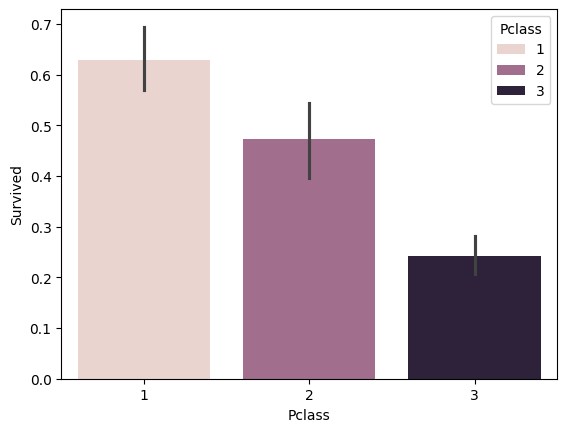

In [14]:
sns.barplot(data=train,x='Pclass',y='Survived',hue='Pclass')

In [15]:
percentage_of_class1 = train[train['Pclass']==1]['Survived'].sum()/len(train[train['Pclass']==1])*100
percentage_of_class1

np.float64(62.96296296296296)

In [16]:
percentage_of_class2 = train[train['Pclass']==2]['Survived'].sum()/len(train[train['Pclass']==2])*100
percentage_of_class2

np.float64(47.28260869565217)

In [17]:
percentage_of_class3 = train[train['Pclass']==3]['Survived'].sum()/len(train[train['Pclass']==3])*100
percentage_of_class3

np.float64(24.236252545824847)

In [18]:
train.Age.fillna(-0.5,inplace=True)

C:\Users\dhana\AppData\Local\Temp\ipykernel_10044\1605338790.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.Age.fillna(-0.5,inplace=True)


In [19]:
test.fillna({'Age':0.5},inplace=True)

In [20]:
bins= [-1,0,5,12,18,24,35,90,np.inf]
labels= ['Unkonown','Baby','Child','Teenager','Student','Young Adult','Adult','Senior']

In [21]:
train['AgeGroup'] = pd.cut(train['Age'],bins,labels=labels)
test['AgeGroup'] = pd.cut(test['Age'],bins,labels=labels)

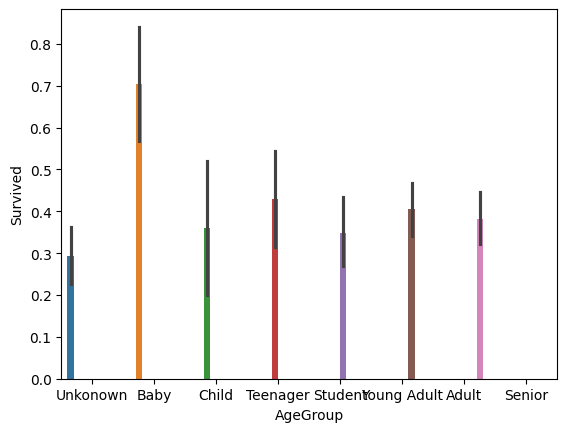

In [22]:
sns.barplot(data=train,x='AgeGroup',y='Survived',hue='AgeGroup')
plt.show()

In [23]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup'],
      dtype='object')

In [24]:
# cabin, fare,Ticket drop column
train.drop(columns={'Cabin','Fare','Ticket'},inplace=True)
test.drop(columns={'Cabin','Fare','Ticket'},inplace=True)

#### Dealing with missing values

In [25]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [26]:
Southampton = train[train['Embarked']=='S'].shape[0]
print("Number of people embarking in Southampton (S) : ",Southampton)
Cherburg = train[train['Embarked']=='C'].shape[0]
print("Number of people embarking in Cherburg (C) : ",Cherburg)
Queeenstown = train[train['Embarked']=='Q'].shape[0]
print("Number of people embarking in Queenstown (Q) : ",Queeenstown)

Number of people embarking in Southampton (S) :  644
Number of people embarking in Cherburg (C) :  168
Number of people embarking in Queenstown (Q) :  77


In [27]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       2
AgeGroup       0
dtype: int64

In [28]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       2
AgeGroup       0
dtype: int64

In [29]:
train.fillna({'Embarked':'S'},inplace=True)

In [30]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
AgeGroup       0
dtype: int64

In [31]:
type(combine)

NameError: name 'combine' is not defined

In [ ]:
train.head()

In [ ]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand=True)
pd.crosstab(train['Title'],train['Sex'])

In [ ]:
train

In [ ]:
for dataset in combine:
        dataset['Title'] = dataset['Title'].replace(['Lady','Capt','Col','Don','Dr','Major','Rev','Jonkheer'],'Rare')
        dataset['Title'] = dataset['Title'].replace(['Sir','Lady','Countess'],'Royal')
        dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
        dataset['Title'] = dataset['Title'].replace('Ms','Miss')
        dataset['Title'] = dataset['Title'].replace('Mme','Mrs')

In [ ]:
train[['Title','Survived']].groupby(['Title'],as_index=False).mean()

In [ ]:
list(train[['Title','Survived']].groupby(['Title'],as_index=False).mean()['Title'])